In [1]:
# Decision Trees. 
# Be sure to use some form of pruning. 

# Boosting. 
# As before, you will want to use some form of pruning, but presumably because you're using boosting you can afford to be much more aggressive about your pruning.

# Support Vector Machines. This should be done in such a way that you can swap out kernel functions. I'd like to see at least two.

# you should design two interesting classification problems. 


# You must submit:

# a file named README.txt containing instructions for running your code (see note below)
# a file named yourgtaccount-analysis.pdf containing your writeup

# we need to be able to get to your code and your data. Given what you're turning in, you will want to arrange for an URL of some sort. 

# The file yourgtaccount-analysis.pdf should contain:

# a description of your classification problems,
# why you feel that they are interesting. 
# capable of admitting comparisons and analysis of the various algorithms on the other. 

# the training and testing error rates you obtained running the various learning algorithms on your problems.

# At the very least you should include graphs that show performance on both training and test data as a function of training size (note that this implies that you need to design a classification problem that has more than a trivial amount of data) and--for the algorithms that are iterative--training times/iterations. 

# Both of these kinds of graphs are referred to as learning curve


# analyses of your results. 

# Why did you get the results you did? 

# Compare and contrast the different algorithms. 

# What sort of changes might you make to each of those algorithms to improve performance? 

# How fast were they in terms of wall clock time? Iterations? 

# Would cross validation help (and if it would, why didn't you implement it?)? 

# How much performance was due to the problems you chose? 

# How about the values you choose for learning rates, stopping criteria, pruning methods, and so forth (and why doesn't your analysis show results for the different values you chose?   Please do look at more than one. 

# And please make sure you understand it, it only counts if the results are meaningful)? 

# Which algorithm performed best? 

# How do you define best? 

# Be creative and think of as many questions you can, and as many answers as you can.

# analysis writeup is limited to 12 pages.

In [2]:
# Training-Test - DONE
# Predict- DONE
# Accuracy - DONE
# Cross-Validation 10-fold - DONE
# Hyper Parameter
# Scaling if needed
# Standardize if needed
#Learning Curve

#export
import numpy as np
import pandas as pd
import time
import gc
import random
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, normalize, RobustScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [3]:
%load_ext autoreload
%autoreload 2
import tests as tests

%matplotlib inline

In [4]:
class Data():
    
    # points [1]
    def dataAllocation(self,path):
        # TODO: Separate out the x_data and y_data and return each
        # args: string path for .csv file
        # return: pandas dataframe, pandas series
        # -------------------------------
        # ADD CODE HERE
        df = pd.read_csv(path)
        x_data = df.iloc[:, 0:-1]
        y_data = df.iloc[:, -1:].squeeze()
        # ------------------------------- 
        return x_data,y_data
    
    # points [1]
    def trainSets(self,x_data,y_data):
        # TODO: Split 70% of the data into training and 30% into test sets. Call them x_train, x_test, y_train and y_test.
        # Use the train_test_split method in sklearn with the parameter 'shuffle' set to true and the 'random_state' set to 614.
        # args: pandas dataframe, pandas dataframe
        # return: pandas dataframe, pandas dataframe, pandas series, pandas series
        # -------------------------------
        # ADD CODE HERE
#         x_train, x_test = train_test_split(x_data, shuffle=True,  random_state=614, test_size=0.3)
#         y_train, y_test = train_test_split(y_data, shuffle=True,  random_state=614, test_size=0.3)
        x_train, x_test = train_test_split(x_data, shuffle=True,  test_size=0.3)
        y_train, y_test = train_test_split(y_data, shuffle=True,  test_size=0.3)
        # -------------------------------
        return x_train, x_test, y_train, y_test

##################################################
##### Do not add anything below this line ########
tests.dataTest(Data)
##################################################

dataAllocation Function Executed
trainSets Function Executed


In [5]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    print("final train_scores_mean=", train_scores_mean[-1])
    print("final test_scores_mean=", test_scores_mean[-1])
    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

#     print("train_sizes", train_sizes)
    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


In [6]:
#export
class DecisionTree():
    
    
# Q3.4.1 Pre-process

    # points [1]
    def dataPreProcess(self,x_train,x_test, preprocess=True):
        # TODO: Pre-process the data to standardize it, otherwise the grid search will take much longer.
        # args: pandas dataframe, pandas dataframe
        # return: pandas dataframe, pandas dataframe
        # -------------------------------
        # ADD CODE HERE
#         scaler = StandardScaler().fit(x_train.values)
        if preprocess:
#             print("yes preprocess")
            scaler = RobustScaler(quantile_range=(2.5, 97.5)).fit(x_train.values)
            scaled_x_train_num = scaler.transform(x_train.values)
            scaled_x_train = pd.DataFrame(scaled_x_train_num)

            scaled_x_test_num = scaler.transform(x_test.values)
            scaled_x_test = pd.DataFrame(scaled_x_test_num)
        else:
#             print("no preprocess")
            scaled_x_train =x_train;
            scaled_x_test =x_test;
        # -------------------------------
        return scaled_x_train, scaled_x_test
    
# Q3.4.2 Classification

    # points [1]
    def classifier(self,scaled_x_train,scaled_x_test, y_train):
        # TODO: Create a SVC classifier and train it. Set gamma = 'auto'
        # args: pandas dataframe, pandas dataframe, pandas series
        # return: numpy array, numpy array
        # -------------------------------
        # ADD CODE HERE
        clf = tree.DecisionTreeClassifier(max_depth=20)
#         clf = tree.DecisionTreeClassifier()
        clf.fit(scaled_x_train.values, y_train.values)

        y_predict_train = clf.predict(scaled_x_train.values)
        y_predict_test = clf.predict(scaled_x_test.values)
        # -------------------------------
        return y_predict_train,y_predict_test

    # points [1]
    def trainAccuracy(self,y_train,y_predict_train):
        # TODO: Return accuracy on the training set using the accuracy_score method.
        # args: pandas series, numpy array
        # return: float
        # -------------------------------
        # ADD CODE HERE
        train_accuracy = accuracy_score(y_train.values, y_predict_train)
        # -------------------------------
        return train_accuracy
    
    # points [1]
    def testAccuracy(self,y_test,y_predict_test):
        # TODO: Return accuracy on the test set using the accuracy_score method.
        # args: pandas series, numpy array
        # return: float
        # -------------------------------
        # ADD CODE HERE
        test_accuracy = accuracy_score(y_test.values, y_predict_test)

        # -------------------------------
        return test_accuracy
    
    def bestScore(self, scaled_x_train, y_train):
        # TODO: Tune the hyper-parameters 'C' and 'kernel' (use rbf and linear).
        # Note: Set n_jobs = -1 and return_train_score = True and gamma = 'auto'
        # args: pandas dataframe, pandas series
        # return: GridSearchCV object, float
        # -------------------------------
#         svm_parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.1, 1.0]}
        # ADD CODE HERE

        clf = tree.DecisionTreeClassifier(max_depth=20)
#         params = {
#             'max_depth': list(range(1, 20)),
#             'criterion': ['gini', 'entropy'],
#         }
        path = clf.cost_complexity_pruning_path(scaled_x_train, y_train)
        ccp_alphas, impurities = path.ccp_alphas, path.impurities

#         params = {'max_depth':[1, 2, 3, 4, 5],
#              "splitter":["best","random"],
#             'criterion': ['gini', 'entropy'],
#              'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#              'min_samples_split':[2, 3, 4, 5],
#          }

        params = {
#             'max_depth':[5, 10, 15, 20],
            "splitter":["best","random"],
            'criterion': ['gini', 'entropy'],
            'ccp_alpha':ccp_alphas
        }
        
        grid_search = GridSearchCV(clf,  
                                   param_grid=params,  
                                   cv=8,
                                   )
    
#         grid_search.fit(features, targets)
        grid_search.fit(scaled_x_train, y_train)
        best_score = grid_search.best_score_
        
        
        # -------------------------------

#         return svm_cv, best_score
        return grid_search, best_score
    
    # points [1]
    def classifierParam(self,svm_cv,scaled_x_train,scaled_x_test,y_train):
        # TODO: Calculate the training and test set accuracy values after hyperparameter tuning and standardization.
        # args: GridSearchCV object, pandas dataframe, pandas dataframe, pandas series
        # return: numpy series, numpy series
        # -------------------------------
        # ADD CODE HERE
        best = svm_cv.best_estimator_
        best.fit(scaled_x_train, y_train)
        # y_predict_train = best.predict(scaled_x_train.values)
        y_predict_train = best.predict(scaled_x_train)
        y_predict_test = best.predict(scaled_x_test)
        # -------------------------------
        return y_predict_train,y_predict_test
    
##################################################
##### Do not add anything below this line ########
# tests.DecisionTreeTest(Data,DecisionTree)
##################################################

# x = np.linspace(0, 10, 100)
# y = x + np.random.randn(100) 
# plt.plot(x, y, label="test")
# plt.legend()
# plt.show()


****** Decision Tree Starting ******
***Preprocessed YES***
classifier Function Executed
Train Accuracy:  1.0
Test Accuracy:  0.32222222222222224
Best Paramas:  {'ccp_alpha': 0.015103047411927972, 'criterion': 'gini', 'splitter': 'random'}
Train Accuracy after Optimization:  0.5458937198067633
MAE = 1.06,  RMSE = 1.65,  score = 0.52
final train_scores_mean= 0.5454545454545454
final test_scores_mean= 0.5459930313588851


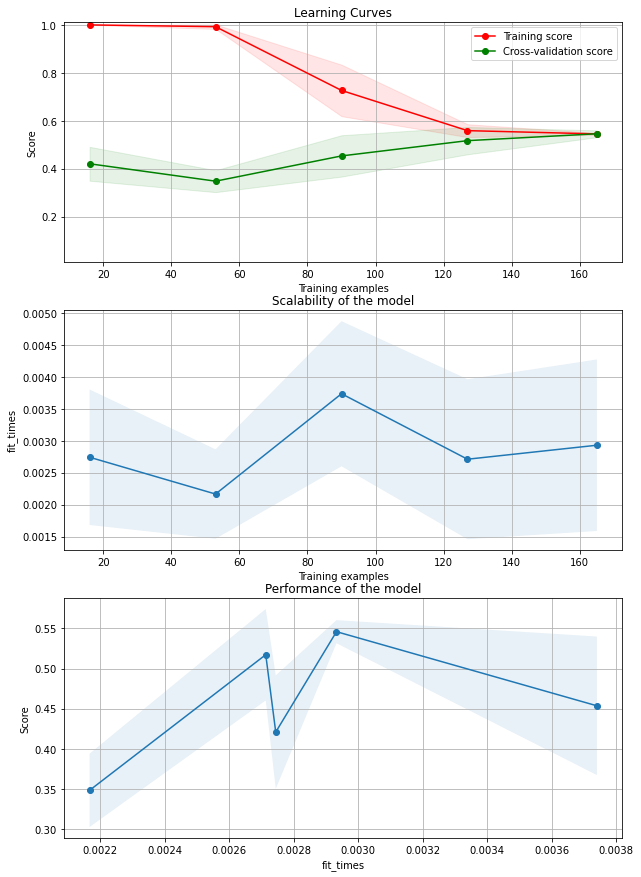

***Preprocessed NO***
classifier Function Executed
Train Accuracy:  1.0
Test Accuracy:  0.25555555555555554
Best Paramas:  {'ccp_alpha': 0.01159511364069743, 'criterion': 'gini', 'splitter': 'random'}
Train Accuracy after Optimization:  0.5603864734299517
MAE = 1.02,  RMSE = 1.58,  score = 0.49
final train_scores_mean= 0.5757575757575758
final test_scores_mean= 0.5555168408826946


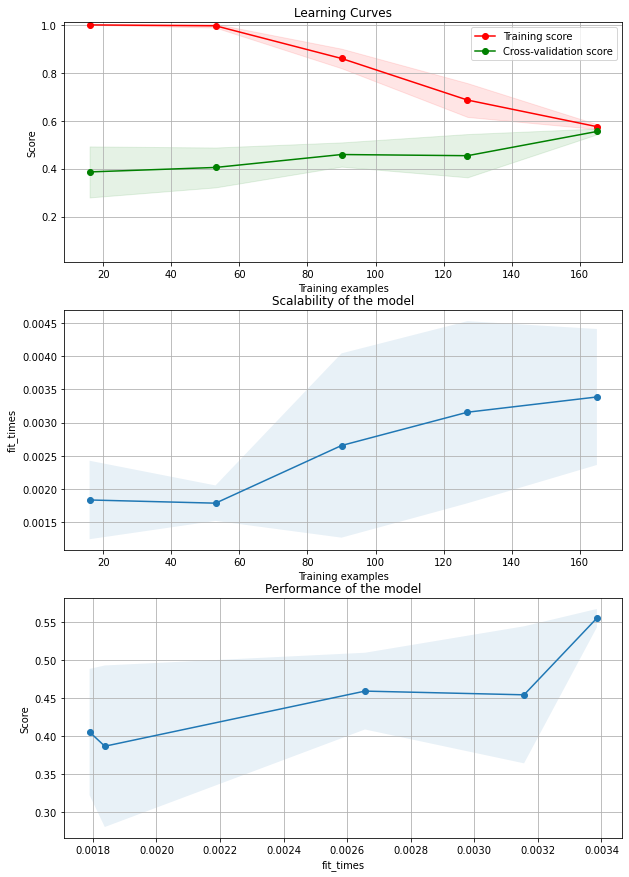

In [7]:
def DecisionTreeTest(data, preprocess=True):
    dataset = Data()
    svm = DecisionTree()
    # data = 'data/pima-indians-diabetes.csv'
#     data = '/Users/kobayashitomio/devhome/datavis/hw4-skeleton/Q3/data/cleveland.csv'
    x_data,y_data = dataset.dataAllocation(data)
    x_train, x_test, y_train, y_test = dataset.trainSets(x_data,y_data)
    # print("x_train", x_train)
    # print("y_train", y_train)
    # print("x_test", x_test)
    # print("y_test", y_test)
    try: 
        scaled_x_train, scaled_x_test = svm.dataPreProcess(x_train,x_test, preprocess)
#         print("dataPreProcess Function Executed")
    except Exception as e:
        print("Failed to execute dataPreProcess()")
        print(e)
    try: 
        y_predict_train,y_predict_test = svm.classifier(scaled_x_train,scaled_x_test, y_train)
        print("classifier Function Executed")
    except Exception as e:
        print("Failed to execute classifier()")
        print(e)
    try: 
        print("Train Accuracy: ",svm.trainAccuracy(y_train,y_predict_train))
    except Exception as e:
        print("Failed to execute trainAccuracy()")
        print(e)
    try: 
        print("Test Accuracy: ",svm.testAccuracy(y_test,y_predict_test))
    except Exception as e:
        print("Failed to execute testAccuracy()")
        print(e)
    try: 
        svm_cv, best_score = svm.bestScore(scaled_x_train, y_train)
#         print("Best Score: ", best_score)
        print("Best Paramas: ", svm_cv.best_params_)

    #     plt.figure(figsize=(16,8))
    #     tree.plot_tree(svm_cv.best_estimator_)
    #     plt.show()

    except Exception as e:
        print("Failed to execute bestScore()")
        print(e)
    try: 
        y_predict_train,y_predict_test = svm.classifierParam(svm_cv,scaled_x_train,scaled_x_test,y_train)
#         print("classifierParam Function Executed")
    except Exception as e:
        print("Failed to execute classifierParam()")
        print(e)
    try: 
        print("Train Accuracy after Optimization: ",svm.trainAccuracy(y_train,y_predict_train))
    except Exception as e:
        print("Failed to execute trainAccuracy()")
        print(e)
    try: 
        mae = mean_absolute_error(y_test, y_predict_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_predict_test)) 
        score = svm.testAccuracy(y_test,y_predict_test)

        print("MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (mae, rmse, score))

    #     print("Test Accuracy by Best Estimator: ",svm.testAccuracy(y_test,y_predict_test))

    except Exception as e:
        print("Failed to execute testAccuracy() by Test Estimator")
        print(e)

    try:
        fig, axes = plt.subplots(3, 1, figsize=(10, 15))
        title = "Learning Curves"
#         cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
#         cv = ShuffleSplit(n_splits=10, test_size=0.3)
        estimator = svm_cv.best_estimator_
        plot_learning_curve(
            estimator, title, scaled_x_train, y_train, axes=axes[:], ylim=(0.01, 1.01), 
            cv=5, 
            n_jobs=4
        )
        plt.show()
    except Exception as e:
        print("Failed to execute learning curve")
        print(e)
        
# https://archive.ics.uci.edu/ml/datasets/heart+disease

print("****** Decision Tree Starting ******")
for k in range(1, 2):
    print("***Preprocessed YES***")
#     DecisionTreeTest('/Users/kobayashitomio/devhome/datavis/hw4-skeleton/Q3/data/cleveland.csv', True)
    DecisionTreeTest('data/cleveland.csv', True)
for k in range(1, 2):
    print("***Preprocessed NO***")
    DecisionTreeTest('data/cleveland.csv', False)

In [7]:
#export
class NeuralNetwork():
# Q3.4.1 Pre-process

    # points [1]
    def dataPreProcess(self,x_train,x_test, preprocess=True):
        # TODO: Pre-process the data to standardize it, otherwise the grid search will take much longer.
        # args: pandas dataframe, pandas dataframe
        # return: pandas dataframe, pandas dataframe
        # -------------------------------
        # ADD CODE HERE
        if preprocess:
#             print("yes preprocess")
            scaler = RobustScaler(quantile_range=(2.5, 97.5)).fit(x_train.values)
            scaled_x_train_num = scaler.transform(x_train.values)
            scaled_x_train = pd.DataFrame(scaled_x_train_num)

            scaled_x_test_num = scaler.transform(x_test.values)
            scaled_x_test = pd.DataFrame(scaled_x_test_num)
        else:
#             print("no preprocess")
            scaled_x_train =x_train;
            scaled_x_test =x_test;
        # -------------------------------
        return scaled_x_train, scaled_x_test

# Q3.4.2 Classification

    # points [1]
    def classifier(self,scaled_x_train,scaled_x_test, y_train):
        # TODO: Create a SVC classifier and train it. Set gamma = 'auto'
        # args: pandas dataframe, pandas dataframe, pandas series
        # return: numpy array, numpy array
        # -------------------------------
        # ADD CODE HERE

#         print("Hello1")
        clf = MLPClassifier()
#         clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
#         MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), random_state=1, solver='lbfgs')
#         print("Hello2")
        clf.fit(scaled_x_train.values, y_train.values)
#         print("Hello3")
        y_predict_train = clf.predict(scaled_x_train.values)
#         print("Hello4")
        y_predict_test = clf.predict(scaled_x_test.values)

        # -------------------------------
        return y_predict_train,y_predict_test

    # points [1]
    def trainAccuracy(self,y_train,y_predict_train):
        # TODO: Return accuracy on the training set using the accuracy_score method.
        # args: pandas series, numpy array
        # return: float
        # -------------------------------
        # ADD CODE HERE
        train_accuracy = accuracy_score(y_train.values, y_predict_train)
        # -------------------------------
        return train_accuracy

    # points [1]
    def testAccuracy(self,y_test,y_predict_test):
        # TODO: Return accuracy on the test set using the accuracy_score method.
        # args: pandas series, numpy array
        # return: float
        # -------------------------------
        # ADD CODE HERE
        test_accuracy = accuracy_score(y_test.values, y_predict_test)

        # -------------------------------
        return test_accuracy

    def bestScore(self, scaled_x_train, y_train):
        # TODO: Tune the hyper-parameters 'C' and 'kernel' (use rbf and linear).
        # Note: Set n_jobs = -1 and return_train_score = True and gamma = 'auto'
        # args: pandas dataframe, pandas series
        # return: GridSearchCV object, float
        # -------------------------------
#         svm_parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.1, 1.0]}
        # ADD CODE HERE

        clf = MLPClassifier()


        params = {
            "solver":["lbfgs", "sgd", "adam"], 
#             "hidden_layer_sizes":[(100,), (100, 10), (100, 100, 10), (100, 100, 100, 10)], 
#             "hidden_layer_sizes":[(15,), (100,), (100, 15), (100, 100, 15)],
            "hidden_layer_sizes":[(15,), (50,), (100, ), (150,), (200,)],
            "alpha":[0.001, 0.0001, 0.0001, 0.00001, 0.00001], 
        }

#         params = {
# #             'activation' : ['identity', 'logistic', 'tanh', 'relu'],
#             'activation' : ['relu'],
# #             "solver":["lbfgs", "sgd", "adam"], 
#             "solver":["lbfgs", "adam"], 
# #             "hidden_layer_sizes":[(30,), (30, 10)], 
#             "hidden_layer_sizes":[(100,), (100, 100), (100,100,100)],
# #             "hidden_layer_sizes":[(100,), (100, 10), (100, 100, 10), (100, 100, 100, 10)], 
# #             "hidden_layer_sizes":[(10,), (10, 10), (10, 10, 10), (10, 10, 10, 10), (10, 10, 10, 10, 10), (10, 10, 10, 10, 10, 10)], 
# #             "hidden_layer_sizes":[(50,), (50, 50), (50, 50, 50), (50, 50, 50, 50), (50, 50, 50, 50, 50), (50, 50, 50, 50, 50, 50)], 
# #             "hidden_layer_sizes":[(100,), (100, 50), (100, 50, 25), (100, 50, 25, 10), (100, 50, 25, 10, 5), (100, 50, 25, 10, 5, 5)], 
# #             "hidden_layer_sizes":[(10, 10, 10), (50, 50, 50), (100, 100, 100)], 
# #             "alpha":[0.1,0.01,0.001, 0.0001],
#         }

#         params= [
#             {
#                 'activation' : ['identity', 'logistic', 'tanh', 'relu'],
#                 'solver' : ['lbfgs', 'sgd', 'adam'],
#                 'hidden_layer_sizes': [
#                  (1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), (12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,),(21,)
#                  ]
#             }
#        ]
        grid_search = GridSearchCV(clf,  
                                   param_grid=params,  
                                   cv=5,
                                   )

#         grid_search.fit(features, targets)
        grid_search.fit(scaled_x_train, y_train)
        best_score = grid_search.best_score_


        # -------------------------------

#         return svm_cv, best_score
        return grid_search, best_score

    # points [1]
    def classifierParam(self,svm_cv,scaled_x_train,scaled_x_test,y_train):
        # TODO: Calculate the training and test set accuracy values after hyperparameter tuning and standardization.
        # args: GridSearchCV object, pandas dataframe, pandas dataframe, pandas series
        # return: numpy series, numpy series
        # -------------------------------
        # ADD CODE HERE
        best = svm_cv.best_estimator_
        best.fit(scaled_x_train, y_train)
        # y_predict_train = best.predict(scaled_x_train.values)
        y_predict_train = best.predict(scaled_x_train)
        y_predict_test = best.predict(scaled_x_test)
        # -------------------------------
        return y_predict_train,y_predict_test

##################################################
##### Do not add anything below this line ########
# tests.NeuralNetworkTest(Data,NeuralNetwork)
##################################################


****** Neural Network Starting ******
***Preprocessed YES***
dataPreProcess Function Executed


/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomi

classifier Function Executed
Train Accuracy:  0.5748792270531401
Test Accuracy:  0.5444444444444444


/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:58

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:58

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:58

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:58

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:58

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:58

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:58

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:58

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:58

Best Paramas:  {'alpha': 0.0001, 'hidden_layer_sizes': (15,), 'solver': 'adam'}


/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Train Accuracy after Optimization:  0.5265700483091788
MAE = 0.86,  RMSE = 1.48,  score = 0.57
final train_scores_mean= 0.5478787878787879
final test_scores_mean= 0.5311265969802555


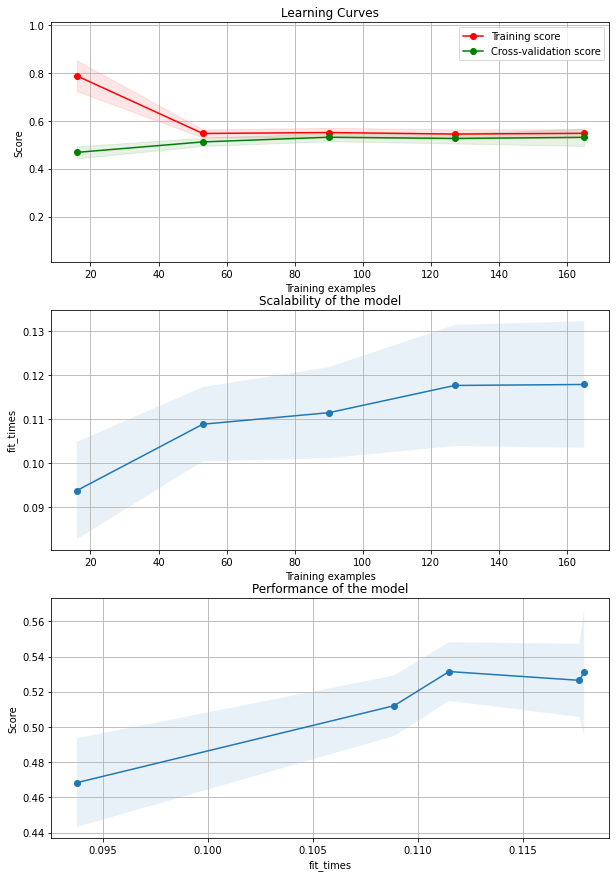

***Preprocessed NO***
dataPreProcess Function Executed
classifier Function Executed
Train Accuracy:  0.4057971014492754
Test Accuracy:  0.43333333333333335


/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:58

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:58

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:58

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:58

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:58

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:58

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

Best Paramas:  {'alpha': 0.0001, 'hidden_layer_sizes': (15,), 'solver': 'sgd'}
Train Accuracy after Optimization:  0.5410628019323671
MAE = 0.86,  RMSE = 1.43,  score = 0.53


/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


final train_scores_mean= 0.43999999999999995
final test_scores_mean= 0.4459930313588851


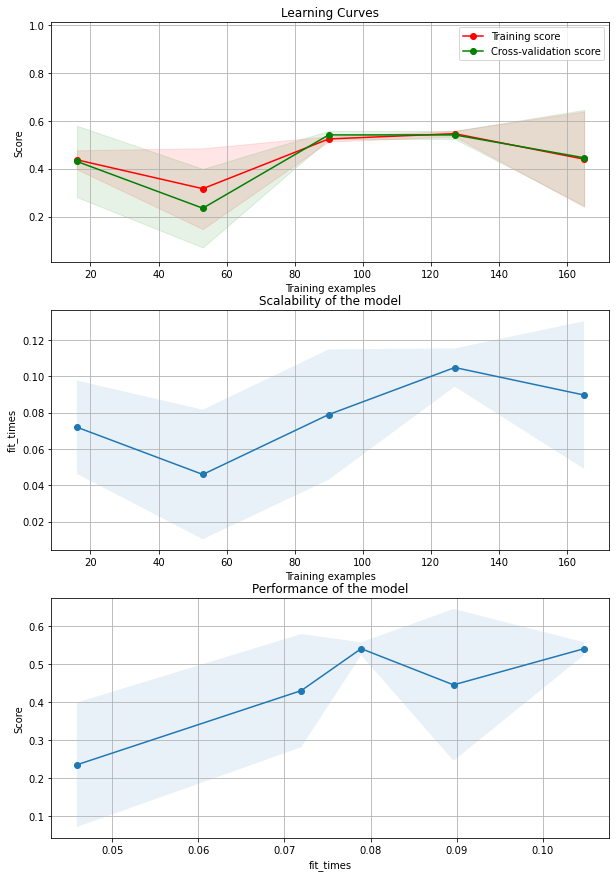

In [21]:
def NeuralNetworkTest(data, preprocess=True):
    # print("****** Neural Network Starting ******")
    dataset = Data()
    svm = NeuralNetwork()
    # data = 'data/pima-indians-diabetes.csv'
#     data = '/Users/kobayashitomio/devhome/datavis/hw4-skeleton/Q3/data/cleveland.csv'
    x_data,y_data = dataset.dataAllocation(data)
    x_train, x_test, y_train, y_test = dataset.trainSets(x_data,y_data)
    # print("x_train", x_train)
    # print("y_train", y_train)
    # print("x_test", x_test)
    # print("y_test", y_test)
    try: 
        scaled_x_train, scaled_x_test = svm.dataPreProcess(x_train,x_test, preprocess)
        print("dataPreProcess Function Executed")
        # print("scaled_x_train", scaled_x_train)
        # print("scaled_x_test", scaled_x_test)
    except Exception as e:
        print("Failed to execute dataPreProcess()")
        print(e)
    try: 
        y_predict_train,y_predict_test = svm.classifier(scaled_x_train,scaled_x_test, y_train)
        print("classifier Function Executed")
    except Exception as e:
        print("Failed to execute classifier()")
        print(e)
    try: 
        print("Train Accuracy: ",svm.trainAccuracy(y_train,y_predict_train))
    except Exception as e:
        print("Failed to execute trainAccuracy()")
        print(e)
    try: 
        print("Test Accuracy: ",svm.testAccuracy(y_test,y_predict_test))
    except Exception as e:
        print("Failed to execute testAccuracy()")
        print(e)
    try: 
        svm_cv, best_score = svm.bestScore(scaled_x_train, y_train)
    #     print("Best Score: ", best_score)
        print("Best Paramas: ", svm_cv.best_params_)
    except Exception as e:
        print("Failed to execute bestScore()")
        print(e)
    try: 
        y_predict_train,y_predict_test = svm.classifierParam(svm_cv,scaled_x_train,scaled_x_test,y_train)
    #     print("classifierParam Function Executed")
    except Exception as e:
        print("Failed to execute classifierParam()")
        print(e)
    try: 
        print("Train Accuracy after Optimization: ",svm.trainAccuracy(y_train,y_predict_train))
    except Exception as e:
        print("Failed to execute trainAccuracy()")
        print(e)
    try: 
        mae = mean_absolute_error(y_test, y_predict_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_predict_test)) 
        score = svm.testAccuracy(y_test,y_predict_test)

        print("MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (mae, rmse, score))
    #     print("Test Accuracy by Best Estimator: ",svm.testAccuracy(y_test,y_predict_test))
    except Exception as e:
        print("Failed to execute testAccuracy() by Test Estimator")
        print(e)

    try:
        fig, axes = plt.subplots(3, 1, figsize=(10, 15))
        title = "Learning Curves"
#         cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#         cv = ShuffleSplit(n_splits=10, test_size=0.3)
        estimator = svm_cv.best_estimator_
        plot_learning_curve(
            estimator, title, scaled_x_train, y_train, axes=axes[:], ylim=(0.01, 1.01), 
            cv=5, 
            n_jobs=4
        )
        plt.show()
    except Exception as e:
        print("Failed to execute learning curve")
        print(e)
        
print("****** Neural Network Starting ******")
print("***Preprocessed YES***")
for k in range(1, 2):
    NeuralNetworkTest('data/cleveland.csv', True)
print("***Preprocessed NO***")
for k in range(1, 2):
    NeuralNetworkTest('data/cleveland.csv', False)

In [6]:
#export
class Booster():
    
    
# Q3.4.1 Pre-process

    # points [1]
    def dataPreProcess(self,x_train,x_test, preprocess=True):
        # TODO: Pre-process the data to standardize it, otherwise the grid search will take much longer.
        # args: pandas dataframe, pandas dataframe
        # return: pandas dataframe, pandas dataframe
        # -------------------------------
        # ADD CODE HERE
        # Uncomment if standardize
        if preprocess:
#             print("yes preprocess")
            scaler = RobustScaler(quantile_range=(2.5, 97.5)).fit(x_train.values)
            scaled_x_train_num = scaler.transform(x_train.values)
            scaled_x_train = pd.DataFrame(scaled_x_train_num)

            scaled_x_test_num = scaler.transform(x_test.values)
            scaled_x_test = pd.DataFrame(scaled_x_test_num)
        else:
#             print("no preprocess")
            scaled_x_train =x_train;
            scaled_x_test =x_test;
        # -------------------------------
        return scaled_x_train, scaled_x_test
    
# Q3.4.2 Classification

    # points [1]
    def classifier(self,scaled_x_train,scaled_x_test, y_train):
        # TODO: Create a SVC classifier and train it. Set gamma = 'auto'
        # args: pandas dataframe, pandas dataframe, pandas series
        # return: numpy array, numpy array
        # -------------------------------
        # ADD CODE HERE
#         clf = SVC(gamma='auto')
#         clf.fit(scaled_x_train.values, y_train.values)
#         clf = tree.DecisionTreeClassifier()
#         clf = AdaBoostClassifier(n_estimators=100)

        DTC = DecisionTreeClassifier(max_depth=20)
        clf = AdaBoostClassifier(base_estimator = DTC)

        clf.fit(scaled_x_train.values, y_train.values)
        y_predict_train = clf.predict(scaled_x_train.values)
        y_predict_test = clf.predict(scaled_x_test.values)
        # -------------------------------
        return y_predict_train,y_predict_test

    # points [1]
    def trainAccuracy(self,y_train,y_predict_train):
        # TODO: Return accuracy on the training set using the accuracy_score method.
        # args: pandas series, numpy array
        # return: float
        # -------------------------------
        # ADD CODE HERE
        train_accuracy = accuracy_score(y_train.values, y_predict_train)
        # -------------------------------
        return train_accuracy
    
    # points [1]
    def testAccuracy(self,y_test,y_predict_test):
        # TODO: Return accuracy on the test set using the accuracy_score method.
        # args: pandas series, numpy array
        # return: float
        # -------------------------------
        # ADD CODE HERE
        test_accuracy = accuracy_score(y_test.values, y_predict_test)

        # -------------------------------
        return test_accuracy
    
    def bestScore(self, scaled_x_train, y_train):
        # TODO: Tune the hyper-parameters 'C' and 'kernel' (use rbf and linear).
        # Note: Set n_jobs = -1 and return_train_score = True and gamma = 'auto'
        # args: pandas dataframe, pandas series
        # return: GridSearchCV object, float
        # -------------------------------
#         svm_parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.1, 1.0]}
        # ADD CODE HERE

#         DTC = DecisionTreeClassifier(random_state = 1)
        DTC = DecisionTreeClassifier(max_depth=20)

#         params = {
#             "base_estimator__criterion" : ["gini", "entropy"],
#             'base_estimator__max_depth':[5, 10, 15, 20],
# #             'base_estimator__max_depth':[10],
# #              'base_estimator__min_samples_leaf':[1, 3, 4, 5, 6, 7, 9],
#              'base_estimator__min_samples_leaf':[7, 8, 9, 10],
# #              'base_estimator__min_samples_split':[2, 4, 6],
#              'base_estimator__min_samples_split':[5, 6, 7, 8],
#             "base_estimator__splitter" :   ["random"],
# #             "n_estimators": [1, 2, 3, 4, 5]
#             "n_estimators": [1, 10, 20]
# #             'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
# #             'learning_rate': [0.1, 0.5, 1.0, 2.0]
#         }

        path = DTC.cost_complexity_pruning_path(scaled_x_train, y_train)
        ccp_alphas, impurities = path.ccp_alphas, path.impurities
        params = {
#             'base_estimator__max_depth':[5, 10, 15],
            'base_estimator__ccp_alpha':ccp_alphas,
#             "base_estimator__ccp_alpha":[0.001, 0.0001, 0.0001, 0.00001, 0.00001], 
#             "n_estimators": [10, 20, 50, 100]
            "base_estimator__splitter" :   ["random", "best"],
            "n_estimators": [1, 5, 10, 20]
#             'n_estimators': [10, 25, 50],
        }
        
#         clf = AdaBoostClassifier(base_estimator = DTC, n_estimators=20)
        clf = AdaBoostClassifier(base_estimator = DTC)

        grid_search = GridSearchCV(clf,  
                                   param_grid=params,  
                                   cv=8,
                                   )
    
        grid_search.fit(scaled_x_train, y_train)
        best_score = grid_search.best_score_
        
        
        # -------------------------------

#         return svm_cv, best_score
        return grid_search, best_score
    
    # points [1]
    def classifierParam(self,svm_cv,scaled_x_train,scaled_x_test,y_train):
        # TODO: Calculate the training and test set accuracy values after hyperparameter tuning and standardization.
        # args: GridSearchCV object, pandas dataframe, pandas dataframe, pandas series
        # return: numpy series, numpy series
        # -------------------------------
        # ADD CODE HERE
        best = svm_cv.best_estimator_
        best.fit(scaled_x_train, y_train)
        # y_predict_train = best.predict(scaled_x_train.values)
        y_predict_train = best.predict(scaled_x_train)
        y_predict_test = best.predict(scaled_x_test)
        # -------------------------------
        return y_predict_train,y_predict_test
    
##################################################
##### Do not add anything below this line ########
# tests.BoosterTest(Data,Booster)
##################################################


****** Booster Starting ******
***Preprocessed YES***
classifier Function Executed
Train Accuracy:  1.0
Test Accuracy:  0.34444444444444444
Best Paramas:  {'base_estimator__ccp_alpha': 0.01078344651047135, 'base_estimator__splitter': 'random', 'n_estimators': 1}
Train Accuracy after Optimization:  0.4975845410628019
MAE = 0.78,  RMSE = 1.41,  score = 0.63
final train_scores_mean= 0.5224242424242423
final test_scores_mean= 0.47862950058072007


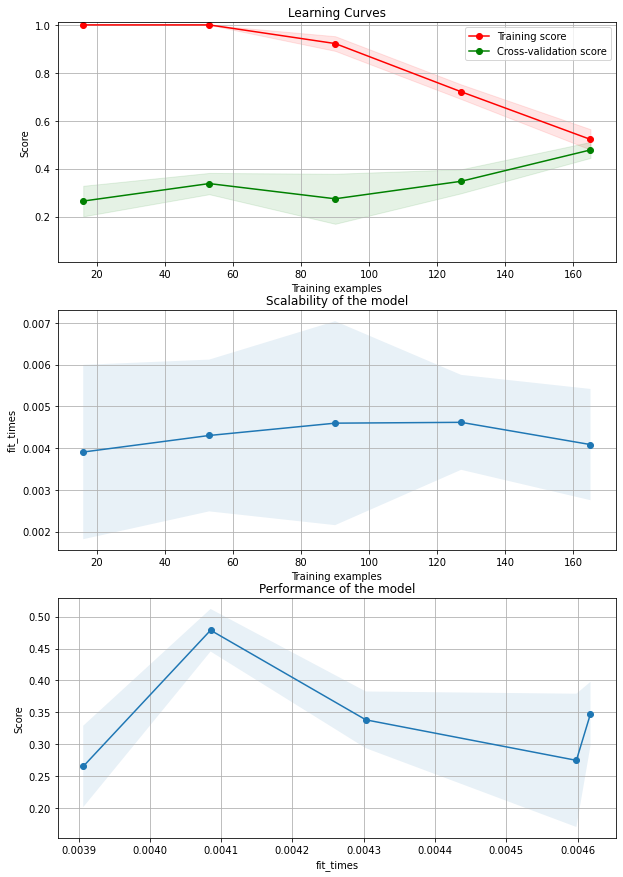

In [7]:
def BoosterTest(data, preprocess=True):
    dataset = Data()
    svm = Booster()
    # data = 'data/pima-indians-diabetes.csv'
#     data = '/Users/kobayashitomio/devhome/datavis/hw4-skeleton/Q3/data/cleveland.csv'
    x_data,y_data = dataset.dataAllocation(data)
    x_train, x_test, y_train, y_test = dataset.trainSets(x_data,y_data)
    # print("x_train", x_train)
    # print("y_train", y_train)
    # print("x_test", x_test)
    # print("y_test", y_test)
    try: 
        scaled_x_train, scaled_x_test = svm.dataPreProcess(x_train,x_test,  preprocess)
#         print("dataPreProcess Function Executed")
    except Exception as e:
        print("Failed to execute dataPreProcess()")
        print(e)
    try: 
        y_predict_train,y_predict_test = svm.classifier(scaled_x_train,scaled_x_test, y_train)
        print("classifier Function Executed")
    except Exception as e:
        print("Failed to execute classifier()")
        print(e)
    try: 
        print("Train Accuracy: ",svm.trainAccuracy(y_train,y_predict_train))
    except Exception as e:
        print("Failed to execute trainAccuracy()")
        print(e)
    try: 
        print("Test Accuracy: ",svm.testAccuracy(y_test,y_predict_test))
    except Exception as e:
        print("Failed to execute testAccuracy()")
        print(e)
    try: 
        svm_cv, best_score = svm.bestScore(scaled_x_train, y_train)
#         print("Best Score: ", best_score)
        print("Best Paramas: ", svm_cv.best_params_)
    #     plt.figure(figsize=(16,8))
    #     tree.plot_tree(svm_cv.best_estimator_)
    #     plt.show()
    except Exception as e:
        print("Failed to execute bestScore()")
        print(e)
    try: 
        y_predict_train,y_predict_test = svm.classifierParam(svm_cv,scaled_x_train,scaled_x_test,y_train)
#         print("classifierParam Function Executed")
    except Exception as e:
        print("Failed to execute classifierParam()")
        print(e)
    try: 
        print("Train Accuracy after Optimization: ",svm.trainAccuracy(y_train,y_predict_train))
    except Exception as e:
        print("Failed to execute trainAccuracy()")
        print(e)
    try:
        mae = mean_absolute_error(y_test, y_predict_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_predict_test)) 
        score = svm.testAccuracy(y_test,y_predict_test)

        print("MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (mae, rmse, score))
    #     print("Test Accuracy by Best Estimator: ",svm.testAccuracy(y_test,y_predict_test))
    except Exception as e:
        print("Failed to execute testAccuracy() by Test Estimator")
        print(e)
    try:
        fig, axes = plt.subplots(3, 1, figsize=(10, 15))
        title = "Learning Curves"
#         cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#         cv = ShuffleSplit(n_splits=50, test_size=0.3)
        estimator = svm_cv.best_estimator_
        plot_learning_curve(
            estimator, title, scaled_x_train, y_train, axes=axes[:], ylim=(0.01, 1.01), 
            cv=5, 
            n_jobs=4
        )
        plt.show()
    except Exception as e:
        print("Failed to execute learning curve")
        print(e)
        
print("****** Booster Starting ******")
print("***Preprocessed YES***")
for k in range(1, 2):
    BoosterTest('data/cleveland.csv', True)
# print("***Preprocessed NO***")
# for k in range(1, 2):
#     BoosterTest('data/cleveland.csv', False)

In [8]:
#export
class MySVM():
    
    
# Q3.4.1 Pre-process

    # points [1]
    def dataPreProcess(self,x_train,x_test, preprocess=True):
        # TODO: Pre-process the data to standardize it, otherwise the grid search will take much longer.
        # args: pandas dataframe, pandas dataframe
        # return: pandas dataframe, pandas dataframe
        # -------------------------------
        # ADD CODE HERE
        if preprocess:
#             print("yes preprocess")
            scaler = RobustScaler(quantile_range=(2.5, 97.5)).fit(x_train.values)
            scaled_x_train_num = scaler.transform(x_train.values)
            scaled_x_train = pd.DataFrame(scaled_x_train_num)

            scaled_x_test_num = scaler.transform(x_test.values)
            scaled_x_test = pd.DataFrame(scaled_x_test_num)
        else:
#             print("no preprocess")
            scaled_x_train =x_train;
            scaled_x_test =x_test;
        # -------------------------------
        return scaled_x_train, scaled_x_test
    
# Q3.4.2 Classification

    # points [1]
    def classifier(self,scaled_x_train,scaled_x_test, y_train):
        # TODO: Create a SVC classifier and train it. Set gamma = 'auto'
        # args: pandas dataframe, pandas dataframe, pandas series
        # return: numpy array, numpy array
        # -------------------------------
        # ADD CODE HERE
#         clf = SVC(gamma='auto')
        clf = SVC()
        clf.fit(scaled_x_train.values, y_train.values)
        y_predict_train = clf.predict(scaled_x_train.values)
        y_predict_test = clf.predict(scaled_x_test.values)
        # -------------------------------
        return y_predict_train,y_predict_test

    # points [1]
    def trainAccuracy(self,y_train,y_predict_train):
        # TODO: Return accuracy on the training set using the accuracy_score method.
        # args: pandas series, numpy array
        # return: float
        # -------------------------------
        # ADD CODE HERE
        train_accuracy = accuracy_score(y_train.values, y_predict_train)
        # -------------------------------
        return train_accuracy
    
    # points [1]
    def testAccuracy(self,y_test,y_predict_test):
        # TODO: Return accuracy on the test set using the accuracy_score method.
        # args: pandas series, numpy array
        # return: float
        # -------------------------------
        # ADD CODE HERE
        test_accuracy = accuracy_score(y_test.values, y_predict_test)

        # -------------------------------
        return test_accuracy
    
    def bestScore(self, scaled_x_train, y_train):
        # TODO: Tune the hyper-parameters 'C' and 'kernel' (use rbf and linear).
        # Note: Set n_jobs = -1 and return_train_score = True and gamma = 'auto'
        # args: pandas dataframe, pandas series
        # return: GridSearchCV object, float
        # -------------------------------
        # ADD CODE HERE

#         clf = SVC(gamma='auto')
        clf = SVC()

#         params = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.1, 1.0]}
        params = {
            'kernel':['linear', 'rbf', 'poly', 'sigmoid'], 
#             'gamma':['scale', 'auto', 'poly'], 
#             'kernel':['linear', 'poly'], 
            'C':[0.01, 0.1, 1.0, 1.5],
              'degree':[2, 3, 4, 5],
        }


        grid_search = GridSearchCV(clf,  
                                   param_grid=params,  
                                   cv=8,
                                   )
        
        grid_search.fit(scaled_x_train, y_train)
        best_score = grid_search.best_score_
        
        
        # -------------------------------

#         return svm_cv, best_score
        return grid_search, best_score
    
    # points [1]
    def classifierParam(self,svm_cv,scaled_x_train,scaled_x_test,y_train):
        # TODO: Calculate the training and test set accuracy values after hyperparameter tuning and standardization.
        # args: GridSearchCV object, pandas dataframe, pandas dataframe, pandas series
        # return: numpy series, numpy series
        # -------------------------------
        # ADD CODE HERE
        best = svm_cv.best_estimator_
        best.fit(scaled_x_train, y_train)
        # y_predict_train = best.predict(scaled_x_train.values)
        y_predict_train = best.predict(scaled_x_train)
        y_predict_test = best.predict(scaled_x_test)
        # -------------------------------
        return y_predict_train,y_predict_test
    
##################################################
##### Do not add anything below this line ########
# tests.MySVMTest(Data,MySVM)
##################################################



****** SVM Starting ******
***Preprocessed YES***
classifier Function Executed
Train Accuracy:  0.5410628019323671
Test Accuracy:  0.5444444444444444
Best Paramas:  {'C': 1.0, 'degree': 2, 'kernel': 'sigmoid'}
Train Accuracy after Optimization:  0.5362318840579711
MAE = 0.81,  RMSE = 1.35,  score = 0.54
final train_scores_mean= 0.5357575757575758
final test_scores_mean= 0.5362369337979095


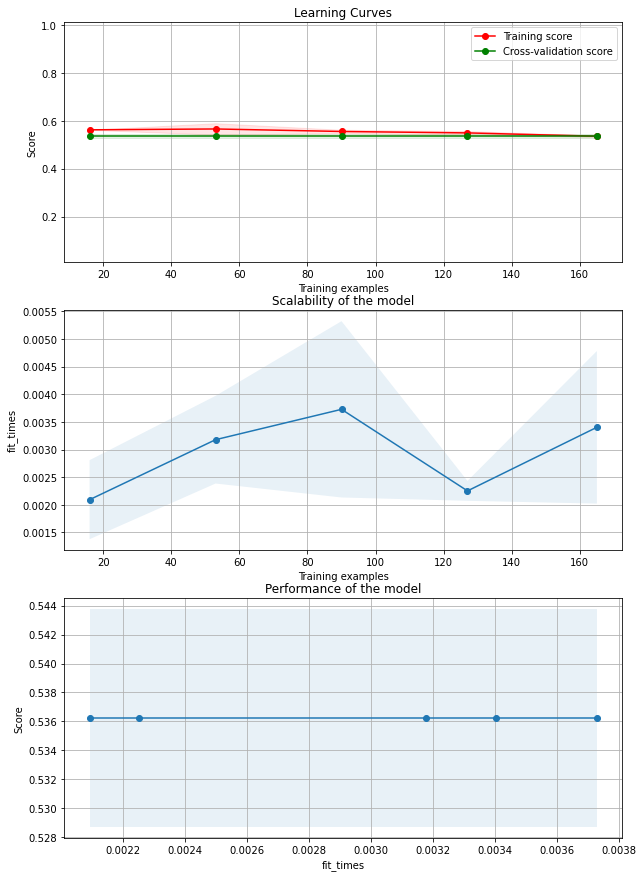

In [9]:
def MySVMTest(data, preprocess=True):
    dataset = Data()
    svm = MySVM()
    # data = 'data/pima-indians-diabetes.csv'
#     data = '/Users/kobayashitomio/devhome/datavis/hw4-skeleton/Q3/data/cleveland.csv'
    x_data,y_data = dataset.dataAllocation(data)
    x_train, x_test, y_train, y_test = dataset.trainSets(x_data,y_data)
    # print("x_train", x_train)
    # print("y_train", y_train)
    # print("x_test", x_test)
    # print("y_test", y_test)
    try: 
        scaled_x_train, scaled_x_test = svm.dataPreProcess(x_train,x_test, preprocess)
#         print("dataPreProcess Function Executed")
    except Exception as e:
        print("Failed to execute dataPreProcess()")
        print(e)
    try: 
        y_predict_train,y_predict_test = svm.classifier(scaled_x_train,scaled_x_test, y_train)
        print("classifier Function Executed")
    except Exception as e:
        print("Failed to execute classifier()")
        print(e)
    try: 
        print("Train Accuracy: ",svm.trainAccuracy(y_train,y_predict_train))
    except Exception as e:
        print("Failed to execute trainAccuracy()")
        print(e)
    try: 
        print("Test Accuracy: ",svm.testAccuracy(y_test,y_predict_test))
    except Exception as e:
        print("Failed to execute testAccuracy()")
        print(e)
    try:
#         if preprocess:
        svm_cv, best_score = svm.bestScore(scaled_x_train, y_train)
#         print("Best Score: ", best_score)
        print("Best Paramas: ", svm_cv.best_params_)
    except Exception as e:
        print("Failed to execute bestScore()")
        print(e)
    try: 
#         if preprocess:
        y_predict_train,y_predict_test = svm.classifierParam(svm_cv,scaled_x_train,scaled_x_test,y_train)
#         print("classifierParam Function Executed")
    except Exception as e:
        print("Failed to execute classifierParam()")
        print(e)
    try: 
        print("Train Accuracy after Optimization: ",svm.trainAccuracy(y_train,y_predict_train))
    except Exception as e:
        print("Failed to execute trainAccuracy()")
        print(e)
    try:
        mae = mean_absolute_error(y_test, y_predict_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_predict_test)) 
        score = svm.testAccuracy(y_test,y_predict_test)
        print("MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (mae, rmse, score))
#         print("Test Accuracy by Best Estimator: ",svm.testAccuracy(y_test,y_predict_test))
    except Exception as e:
        print("Failed to execute testAccuracy() by Test Estimator")
        print(e)
    try:
        fig, axes = plt.subplots(3, 1, figsize=(10, 15))
        title = "Learning Curves"
#         cv = ShuffleSplit(n_splits=50, test_size=0.3, random_state=0)
#         cv = ShuffleSplit(n_splits=5, test_size=0.3)

#         if preprocess:
        estimator = svm_cv.best_estimator_
#         else:
#             estimator = SVC(gamma='auto')
        plot_learning_curve(
            estimator, title, scaled_x_train, y_train, axes=axes[:], ylim=(0.01, 1.01), 
            cv=5, 
            n_jobs=4
        )
        plt.show()
    except Exception as e:
        print("Failed to execute learning curve")
        print(e)

print("****** SVM Starting ******")
print("***Preprocessed YES***")
for k in range(1, 2):
    MySVMTest('data/cleveland.csv', True)
# print("***DONT USE this causes error : Preprocessed NO***")
# for k in range(1, 2):
#     MySVMTest('data/cleveland.csv', False)

In [8]:
#export
class MyKNN():
    
    
# Q3.4.1 Pre-process

    # points [1]
    def dataPreProcess(self,x_train,x_test, preprocess=True):
        # TODO: Pre-process the data to standardize it, otherwise the grid search will take much longer.
        # args: pandas dataframe, pandas dataframe
        # return: pandas dataframe, pandas dataframe
        # -------------------------------
        # ADD CODE HERE
        if preprocess:
#             print("yes preprocess")
            scaler = RobustScaler(quantile_range=(2.5, 97.5)).fit(x_train.values)
            scaled_x_train_num = scaler.transform(x_train.values)
            scaled_x_train = pd.DataFrame(scaled_x_train_num)

            scaled_x_test_num = scaler.transform(x_test.values)
            scaled_x_test = pd.DataFrame(scaled_x_test_num)
        else:
#             print("no preprocess")
            scaled_x_train =x_train;
            scaled_x_test =x_test;
        # -------------------------------
        return scaled_x_train, scaled_x_test
    
# Q3.4.2 Classification

    # points [1]
    def classifier(self,scaled_x_train,scaled_x_test, y_train):
        # TODO: Create a SVC classifier and train it. Set gamma = 'auto'
        # args: pandas dataframe, pandas dataframe, pandas series
        # return: numpy array, numpy array
        # -------------------------------
        # ADD CODE HERE
#         clf = SVC(gamma='auto')
        clf = KNeighborsClassifier()

        clf.fit(scaled_x_train.values, y_train.values)
        y_predict_train = clf.predict(scaled_x_train.values)
        y_predict_test = clf.predict(scaled_x_test.values)
        # -------------------------------
        return y_predict_train,y_predict_test

    # points [1]
    def trainAccuracy(self,y_train,y_predict_train):
        # TODO: Return accuracy on the training set using the accuracy_score method.
        # args: pandas series, numpy array
        # return: float
        # -------------------------------
        # ADD CODE HERE
        train_accuracy = accuracy_score(y_train.values, y_predict_train)
        # -------------------------------
        return train_accuracy
    
    # points [1]
    def testAccuracy(self,y_test,y_predict_test):
        # TODO: Return accuracy on the test set using the accuracy_score method.
        # args: pandas series, numpy array
        # return: float
        # -------------------------------
        # ADD CODE HERE
        test_accuracy = accuracy_score(y_test.values, y_predict_test)

        # -------------------------------
        return test_accuracy
    
    def bestScore(self, scaled_x_train, y_train):
        # TODO: Tune the hyper-parameters 'C' and 'kernel' (use rbf and linear).
        # Note: Set n_jobs = -1 and return_train_score = True and gamma = 'auto'
        # args: pandas dataframe, pandas series
        # return: GridSearchCV object, float
        # -------------------------------
#         svm_parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.1, 1.0]}
        # ADD CODE HERE



#         clf = SVC(gamma='auto')

#         params = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.1, 1.0]}

        
        clf = KNeighborsClassifier()
        k_range = list(range(1, 31))
#         params = dict(n_neighbors=k_range)

        params = {
#             'n_neighbors':[10, 15, 20, 25],
            'n_neighbors':[3, 5, 7, 9],
        'weights':['uniform','distance'],
#         'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
#         'algorithm':['ball_tree', 'kd_tree', 'brute'],
#         'algorithm':['auto'],
#         'leaf_size':[5, 10, 15],
#         'leaf_size':[1, 2, 3, 5, 8, 13, 21],
        'leaf_size':[10, 20, 30, 40],
        'p':[1,2,3]
        }
        
        grid_search = GridSearchCV(clf,  
                                   param_grid=params,  
                                   cv=8,
                                   )
        
        grid_search.fit(scaled_x_train, y_train)
        best_score = grid_search.best_score_
        
        
        # -------------------------------

#         return svm_cv, best_score
        return grid_search, best_score
    
    # points [1]
    def classifierParam(self,svm_cv,scaled_x_train,scaled_x_test,y_train):
        # TODO: Calculate the training and test set accuracy values after hyperparameter tuning and standardization.
        # args: GridSearchCV object, pandas dataframe, pandas dataframe, pandas series
        # return: numpy series, numpy series
        # -------------------------------
        # ADD CODE HERE
        best = svm_cv.best_estimator_
        best.fit(scaled_x_train, y_train)
        # y_predict_train = best.predict(scaled_x_train.values)
        y_predict_train = best.predict(scaled_x_train)
        y_predict_test = best.predict(scaled_x_test)
        # -------------------------------
        return y_predict_train,y_predict_test
    
##################################################
##### Do not add anything below this line ########
# tests.MyKNNTest(Data,MyKNN)
##################################################


****** KNN Starting ******
***Preprocessed YES***
classifier Function Executed
Train Accuracy:  0.5603864734299517
Test Accuracy:  0.5222222222222223
Best Paramas:  {'leaf_size': 10, 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Train Accuracy after Optimization:  0.5507246376811594
MAE = 0.82,  RMSE = 1.39,  score = 0.56
final train_scores_mean= 0.5369696969696969
final test_scores_mean= 0.47375145180023226


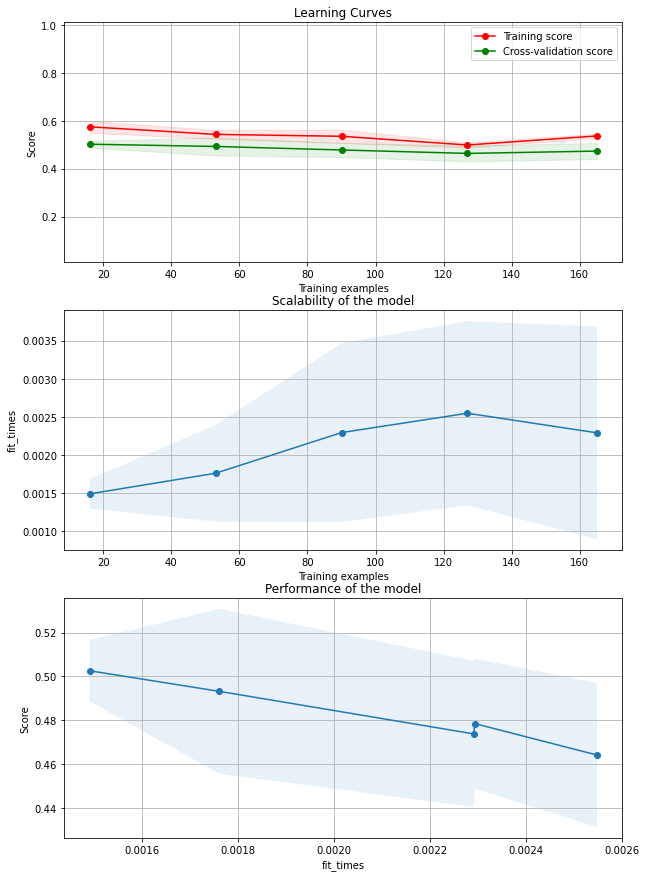

***Preprocessed NO***
classifier Function Executed
Train Accuracy:  0.5893719806763285
Test Accuracy:  0.4
Best Paramas:  {'leaf_size': 10, 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Train Accuracy after Optimization:  0.5265700483091788
MAE = 0.90,  RMSE = 1.47,  score = 0.52
final train_scores_mean= 0.5357575757575758
final test_scores_mean= 0.5121951219512195


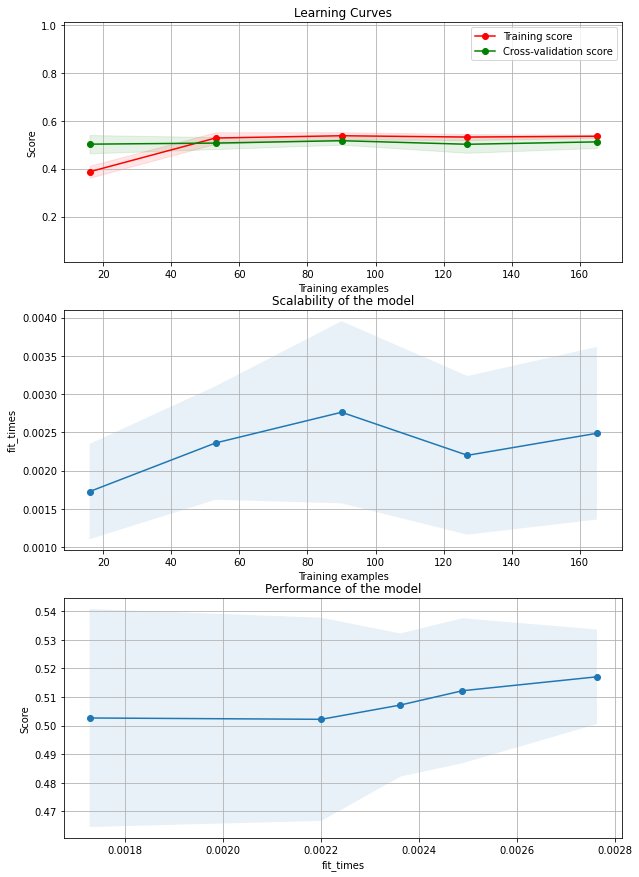

In [9]:

def MyKNNTest(data, preprocess=True):
    dataset = Data()
    svm = MyKNN()
    # data = 'data/pima-indians-diabetes.csv'
#     data = '/Users/kobayashitomio/devhome/datavis/hw4-skeleton/Q3/data/cleveland.csv'
    x_data,y_data = dataset.dataAllocation(data)
    x_train, x_test, y_train, y_test = dataset.trainSets(x_data,y_data)
    # print("x_train", x_train)
    # print("y_train", y_train)
    # print("x_test", x_test)
    # print("y_test", y_test)
    try: 
        scaled_x_train, scaled_x_test = svm.dataPreProcess(x_train,x_test, preprocess)
#         print("dataPreProcess Function Executed")
    except Exception as e:
        print("Failed to execute dataPreProcess()")
        print(e)
    try: 
        y_predict_train,y_predict_test = svm.classifier(scaled_x_train,scaled_x_test, y_train)
        print("classifier Function Executed")
    except Exception as e:
        print("Failed to execute classifier()")
        print(e)
    try: 
        print("Train Accuracy: ",svm.trainAccuracy(y_train,y_predict_train))
    except Exception as e:
        print("Failed to execute trainAccuracy()")
        print(e)
    try: 
        print("Test Accuracy: ",svm.testAccuracy(y_test,y_predict_test))
    except Exception as e:
        print("Failed to execute testAccuracy()")
        print(e)
    try: 
        svm_cv, best_score = svm.bestScore(scaled_x_train, y_train)
#         print("Best Score: ", best_score)
        print("Best Paramas: ", svm_cv.best_params_)
    except Exception as e:
        print("Failed to execute bestScore()")
        print(e)
    try: 
        y_predict_train,y_predict_test = svm.classifierParam(svm_cv,scaled_x_train,scaled_x_test,y_train)
#         print("classifierParam Function Executed")
    except Exception as e:
        print("Failed to execute classifierParam()")
        print(e)
    try: 
        print("Train Accuracy after Optimization: ",svm.trainAccuracy(y_train,y_predict_train))
    except Exception as e:
        print("Failed to execute trainAccuracy()")
        print(e)
    try: 
        mae = mean_absolute_error(y_test, y_predict_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_predict_test)) 
        score = svm.testAccuracy(y_test,y_predict_test)
        print("MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (mae, rmse, score))
#         print("Test Accuracy by Best Estimator: ",svm.testAccuracy(y_test,y_predict_test))
    except Exception as e:
        print("Failed to execute testAccuracy() by Test Estimator")
        print(e)
    try:
        fig, axes = plt.subplots(3, 1, figsize=(10, 15))
        title = "Learning Curves"
#         cv = ShuffleSplit(n_splits=50, test_size=0.3, random_state=0)
#         cv = ShuffleSplit(n_splits=5, test_size=0.3)
        estimator = svm_cv.best_estimator_
        plot_learning_curve(
            estimator, title, scaled_x_train, y_train, axes=axes[:], ylim=(0.01, 1.01), 
            cv=5, 
            n_jobs=4
        )
        plt.show()
    except Exception as e:
        print("Failed to execute learning curve")
        print(e)
        
print("****** KNN Starting ******")
print("***Preprocessed YES***")
for k in range(1, 2):
    MyKNNTest('data/cleveland.csv', True)
print("***Preprocessed NO***")
for k in range(1, 2):
    MyKNNTest('data/cleveland.csv', False)

****** Decision Tree Starting ******
***Preprocessed YES***
classifier Function Executed
Train Accuracy:  0.9222520107238605
Test Accuracy:  0.37083333333333335


/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)


Best Paramas:  {'ccp_alpha': 0.003002135398013217, 'criterion': 'gini', 'splitter': 'best'}
Train Accuracy after Optimization:  0.5361930294906166
MAE = 0.71,  RMSE = 0.97,  score = 0.41
final train_scores_mean= 0.5977653631284915
final test_scores_mean= 0.3923446508648302


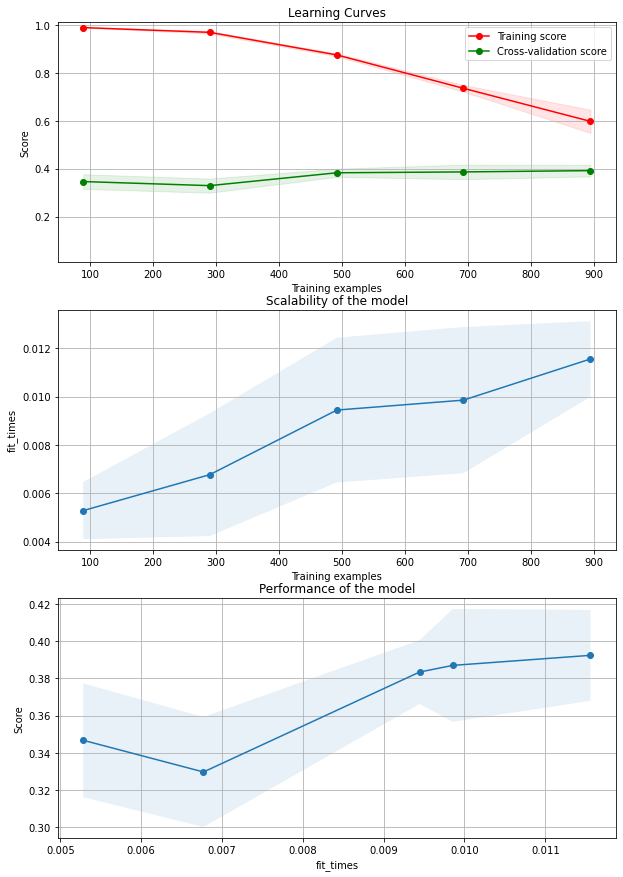

***Preprocessed NO***
classifier Function Executed
Train Accuracy:  0.9329758713136729
Test Accuracy:  0.3729166666666667


/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)


Best Paramas:  {'ccp_alpha': 0.0016155983352669377, 'criterion': 'gini', 'splitter': 'random'}
Train Accuracy after Optimization:  0.5495978552278821
MAE = 0.71,  RMSE = 1.00,  score = 0.41
final train_scores_mean= 0.6601117318435754
final test_scores_mean= 0.38071348494554774


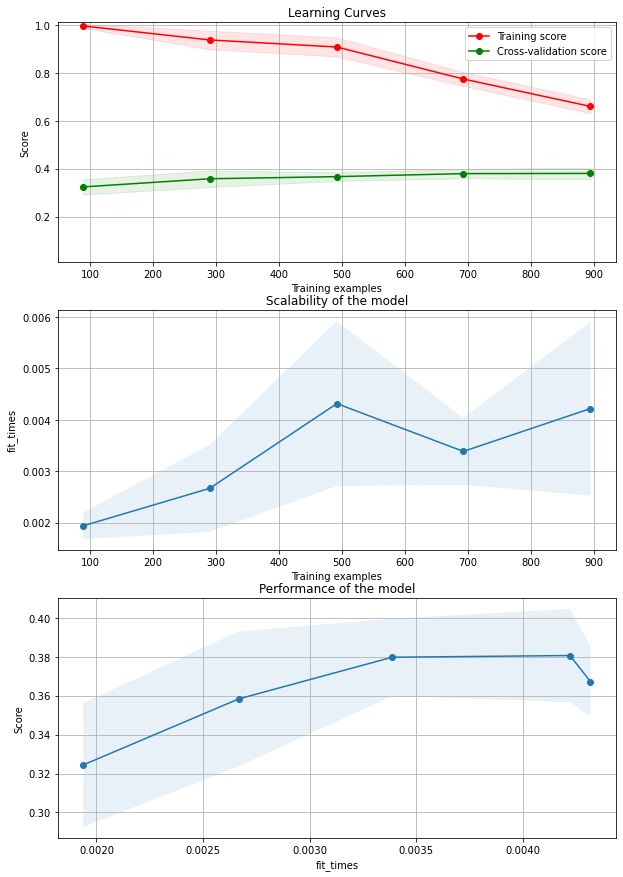

In [28]:
#http://archive.ics.uci.edu/ml/datasets/Wine+Quality

print("****** Decision Tree Starting ******")
for k in range(1, 2):
    print("***Preprocessed YES***")
    DecisionTreeTest('data/winequality-red.csv', True)
for k in range(1, 2):
    print("***Preprocessed NO***")
    DecisionTreeTest('data/winequality-red.csv', False)

****** Neural Network ******
***Preprocessed YES***
dataPreProcess Function Executed


/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


classifier Function Executed
Train Accuracy:  0.5263628239499554
Test Accuracy:  0.41458333333333336


/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:58

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:58

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomi

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:58

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:58

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomi

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:58

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:58

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomi

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:58

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:58

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomi

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:58

Best Paramas:  {'alpha': 1e-05, 'hidden_layer_sizes': (100,), 'solver': 'sgd'}
Train Accuracy after Optimization:  0.43789097408400357
MAE = 0.71,  RMSE = 1.00,  score = 0.42
final train_scores_mean= 0.4308379888268156
final test_scores_mean= 0.41020579756566306


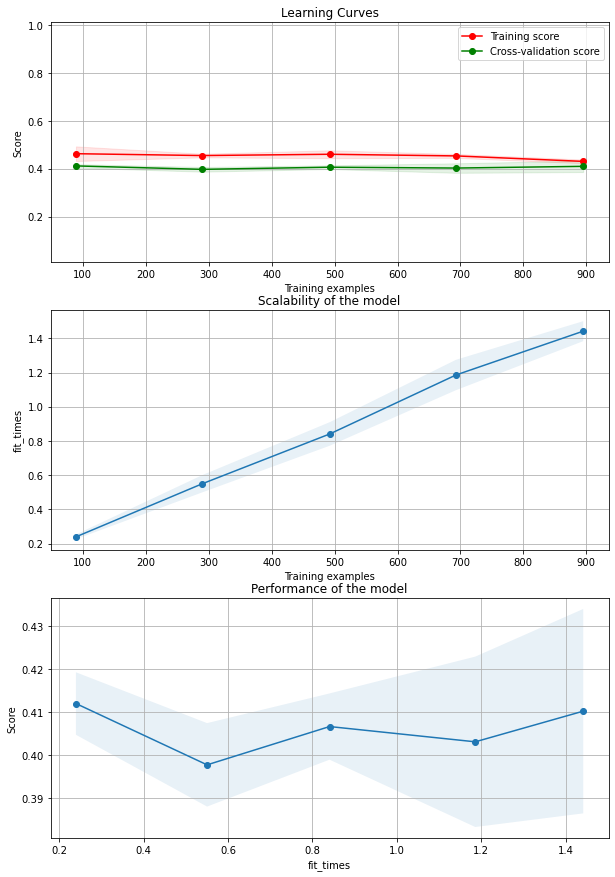

***Preprocessed NO***
dataPreProcess Function Executed
classifier Function Executed
Train Accuracy:  0.4361036639857015
Test Accuracy:  0.41458333333333336


/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:58

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

Best Paramas:  {'alpha': 1e-05, 'hidden_layer_sizes': (15,), 'solver': 'adam'}


/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Train Accuracy after Optimization:  0.4361036639857015
MAE = 0.66,  RMSE = 0.95,  score = 0.45
final train_scores_mean= 0.45005586592178776
final test_scores_mean= 0.4155429212043562


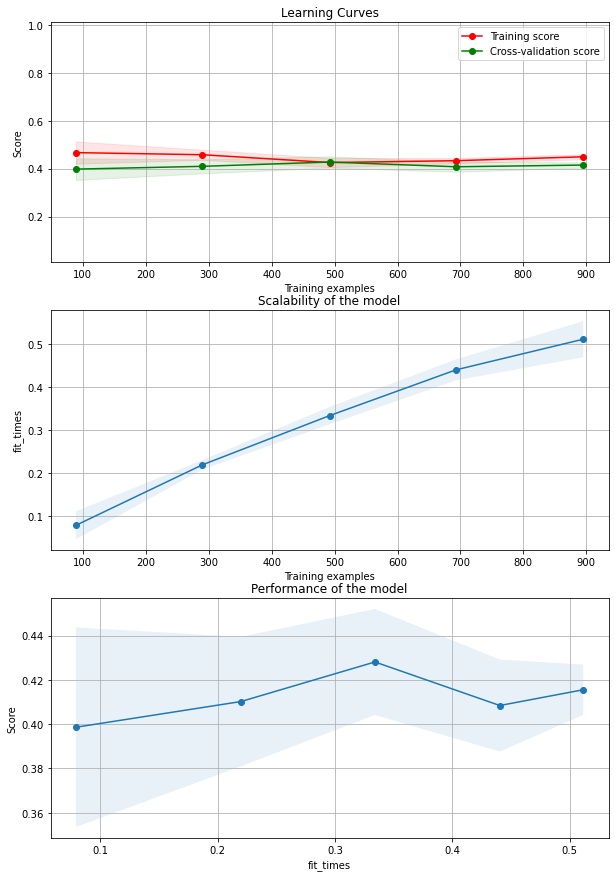

In [29]:
#http://archive.ics.uci.edu/ml/datasets/Wine+Quality

print("****** Neural Network ******")
for k in range(1, 2):
    print("***Preprocessed YES***")
    NeuralNetworkTest('data/winequality-red.csv', True)
for k in range(1, 2):
    print("***Preprocessed NO***")
    NeuralNetworkTest('data/winequality-red.csv', False)

****** Booster Starting ******
***Preprocessed YES***
classifier Function Executed
Train Accuracy:  0.9222520107238605
Test Accuracy:  0.35625
Best Paramas:  {'base_estimator__ccp_alpha': 0.002480866706792099, 'base_estimator__splitter': 'random', 'n_estimators': 1}
Train Accuracy after Optimization:  0.42716711349419123
MAE = 0.75,  RMSE = 1.06,  score = 0.42
final train_scores_mean= 0.4547486033519553
final test_scores_mean= 0.43163036515054454


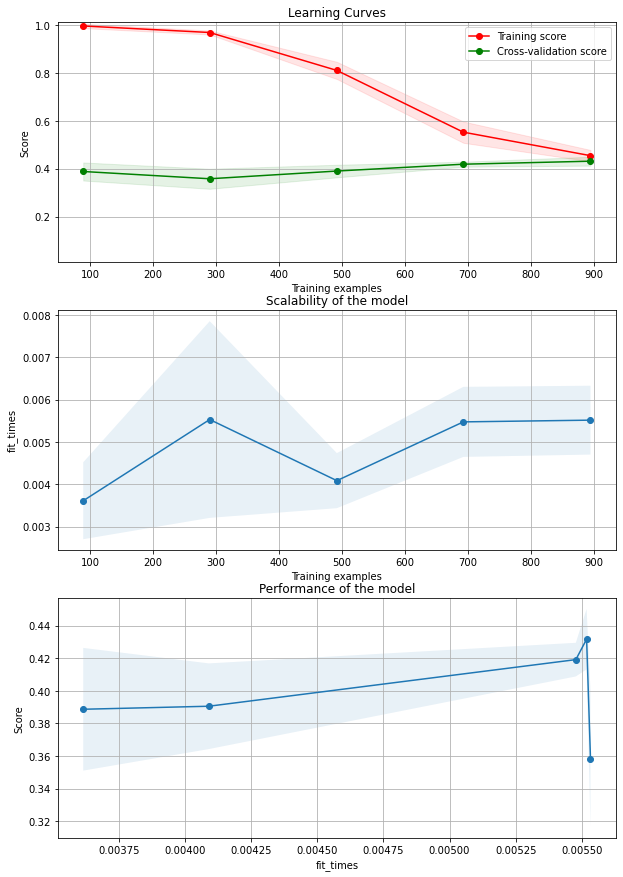

In [10]:
print("****** Booster Starting ******")
print("***Preprocessed YES***")
for k in range(1, 2):
    BoosterTest('data/winequality-red.csv', True)
# print("***Preprocessed NO***")
# for k in range(1, 2):
#     BoosterTest('data/winequality-red.csv', False)

****** SVM Starting ******
***Preprocessed YES***
classifier Function Executed
Train Accuracy:  0.5442359249329759
Test Accuracy:  0.44166666666666665
Best Paramas:  {'C': 1.5, 'degree': 2, 'kernel': 'rbf'}
Train Accuracy after Optimization:  0.5656836461126006
MAE = 0.69,  RMSE = 0.98,  score = 0.44
final train_scores_mean= 0.5731843575418993
final test_scores_mean= 0.44953155028827674


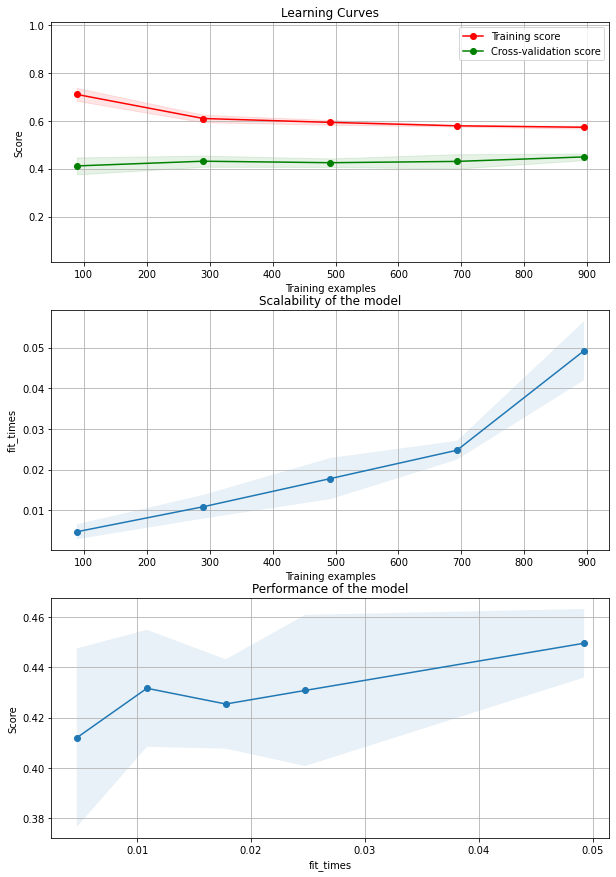

In [10]:
print("****** SVM Starting ******")
print("***Preprocessed YES***")
for k in range(1, 2):
    MySVMTest('data/winequality-red.csv', True)
# print("***DONT USE this causes error : Preprocessed NO***")
# for k in range(1, 2):
#     MySVMTest('data/winequality-red.csv', False)

****** KNN Starting ******
***Preprocessed YES***
classifier Function Executed
Train Accuracy:  0.5630026809651475
Test Accuracy:  0.41458333333333336


/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)


Best Paramas:  {'leaf_size': 20, 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Train Accuracy after Optimization:  0.5236818588025023
MAE = 0.70,  RMSE = 0.98,  score = 0.41
final train_scores_mean= 0.5258100558659218
final test_scores_mean= 0.3949831838565022


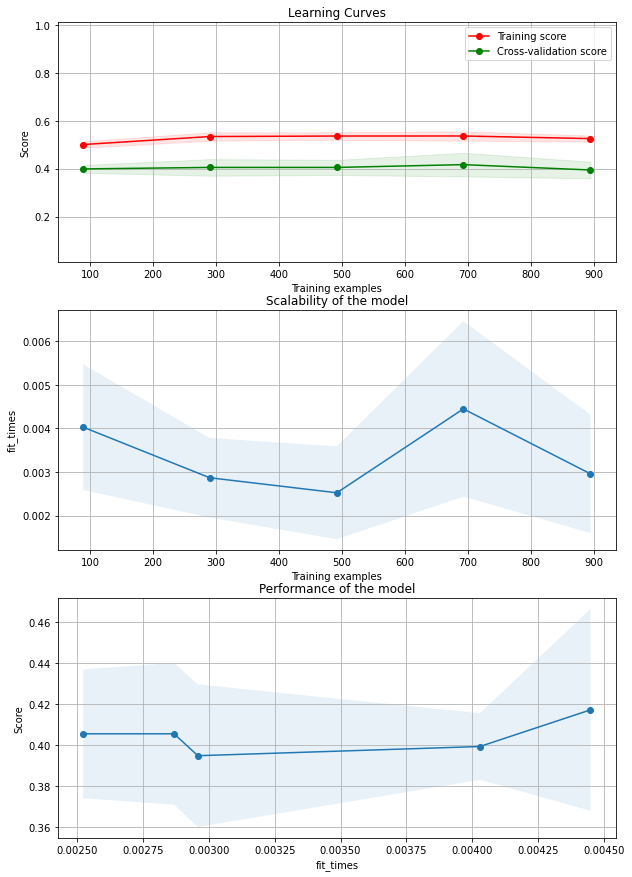

***Preprocessed NO***
classifier Function Executed
Train Accuracy:  0.5755138516532619
Test Accuracy:  0.4083333333333333


/Users/kobayashitomio/opt/anaconda3/envs/Python_ex/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)


Best Paramas:  {'leaf_size': 40, 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Train Accuracy after Optimization:  0.5424486148346738
MAE = 0.70,  RMSE = 0.98,  score = 0.43
final train_scores_mean= 0.5445810055865922
final test_scores_mean= 0.42359865470852015


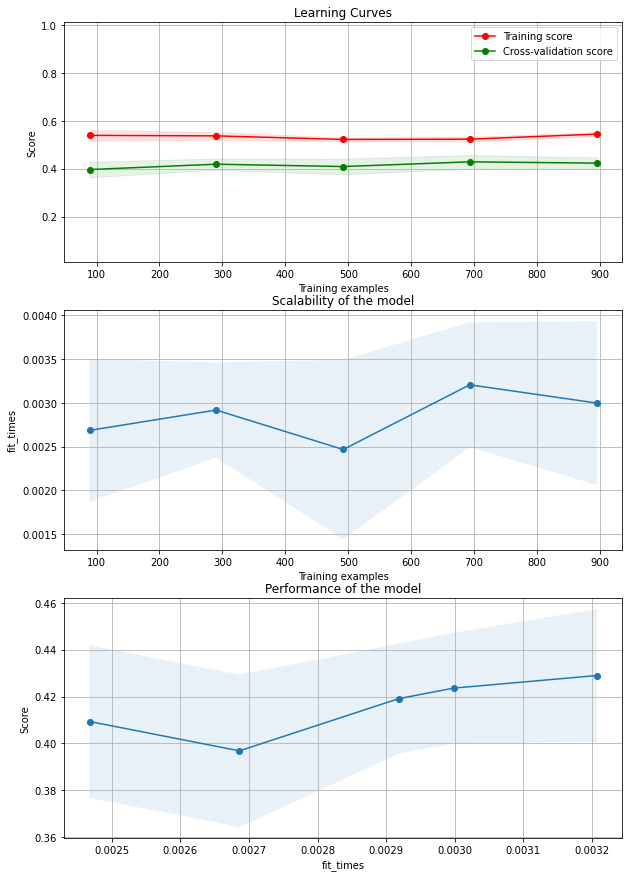

In [11]:
print("****** KNN Starting ******")
print("***Preprocessed YES***")
for k in range(1, 2):
    MyKNNTest('data/winequality-red.csv', True)
print("***Preprocessed NO***")
for k in range(1, 2):
    MyKNNTest('data/winequality-red.csv', False)